In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MaxAbsScaler

%matplotlib inline

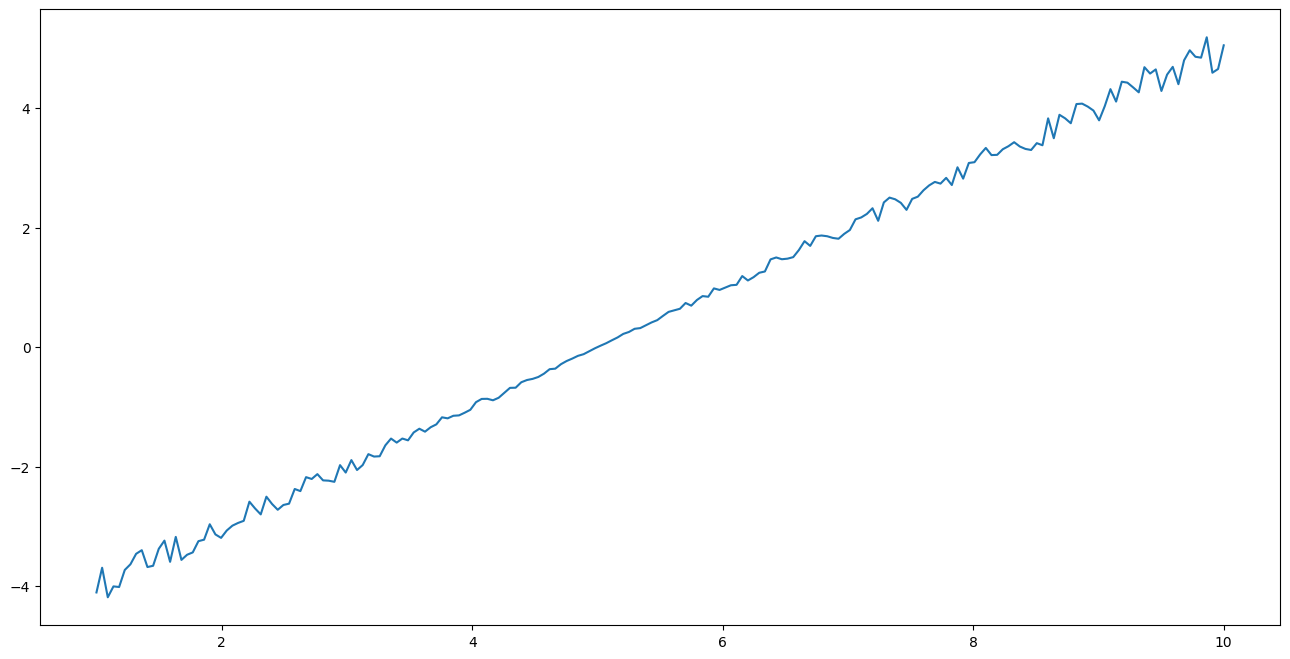

In [3]:
arquivo = np.load("teste1.npy")
x = arquivo[0]
y = arquivo[1]

plt.figure(figsize=(16,8))
plt.plot(x,y)
plt.show()

In [7]:
regr = MLPRegressor(hidden_layer_sizes = (2,2),
                    max_iter = 10000,
                    solver='adam',
                    learning_rate="adaptive",
                    n_iter_no_change=1000)

regr = regr.fit(x,y)
y_est = regr.predict(x)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
arquivos = ['teste2.npy', 'teste3.npy', 'teste4.npy', 'teste5.npy']
iteracoes = 400
arquiteturas = [(10,), (15, 5), (20, 10, 5)]

Carregando teste2.npy


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Arq: (10,) - Media: 0.01897 - Desvio: 0.02386


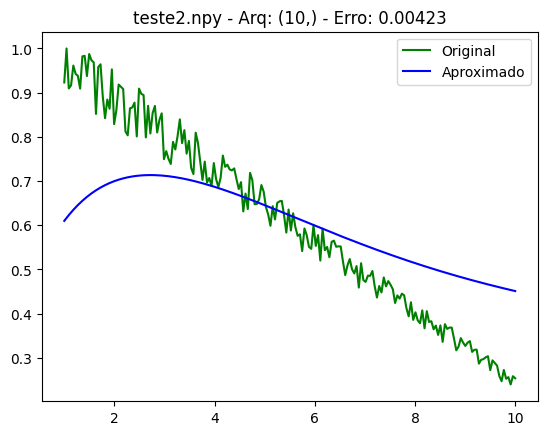

Arq: (15, 5) - Media: 0.00863 - Desvio: 0.00483


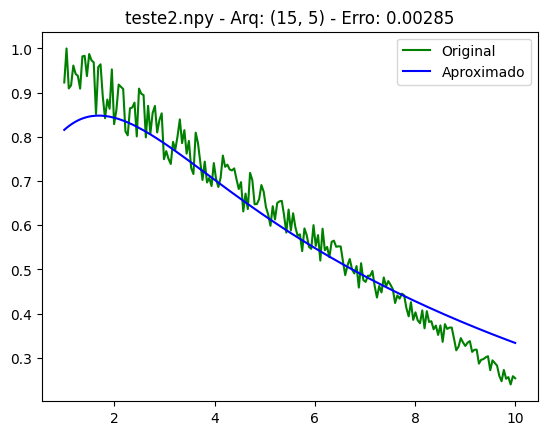

Arq: (20, 10, 5) - Media: 0.01387 - Desvio: 0.02116


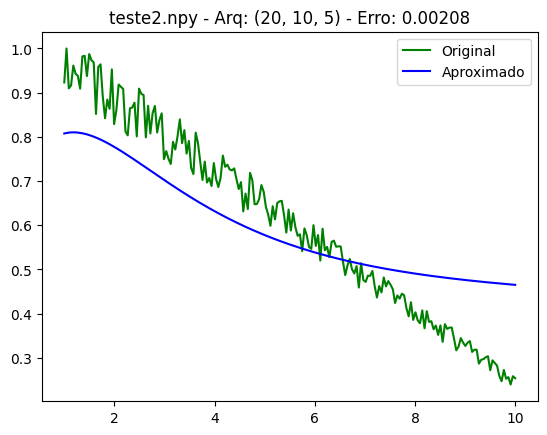

Carregando teste3.npy


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Arq: (10,) - Media: 0.06058 - Desvio: 0.01956


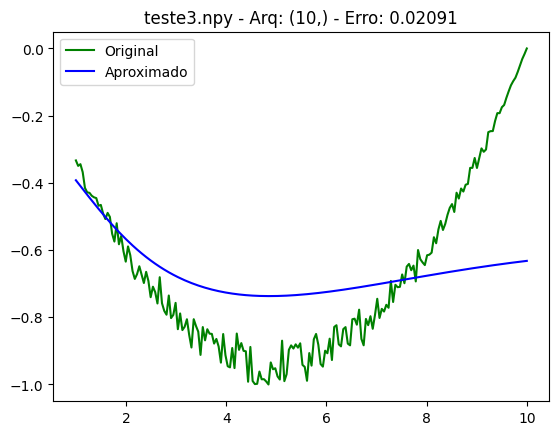

Arq: (15, 5) - Media: 0.05343 - Desvio: 0.02153


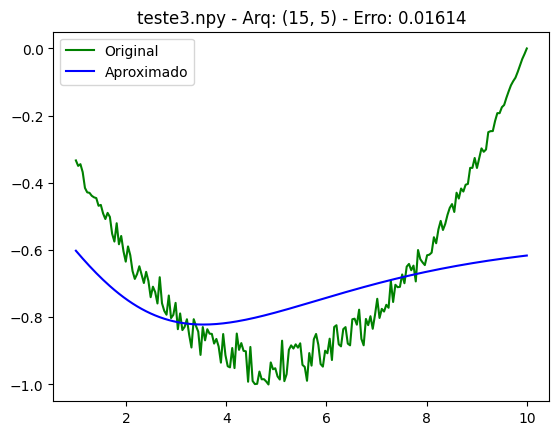

Arq: (20, 10, 5) - Media: 0.06304 - Desvio: 0.02122


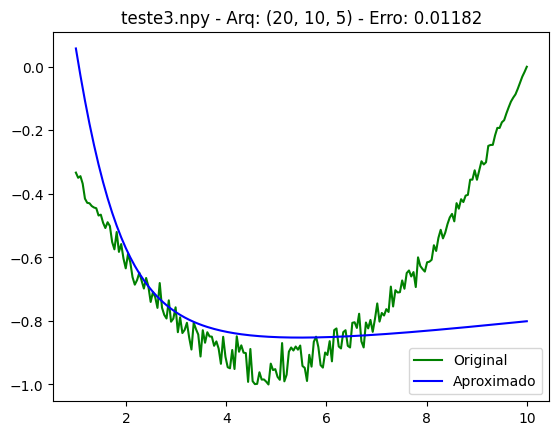

Carregando teste4.npy


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Arq: (10,) - Media: 0.23406 - Desvio: 0.01602


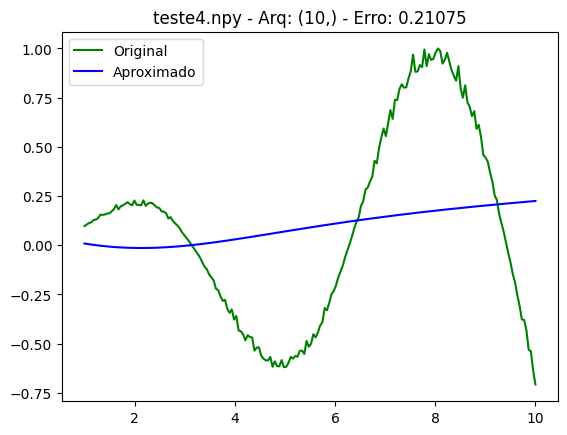

Arq: (15, 5) - Media: 0.21598 - Desvio: 0.03171


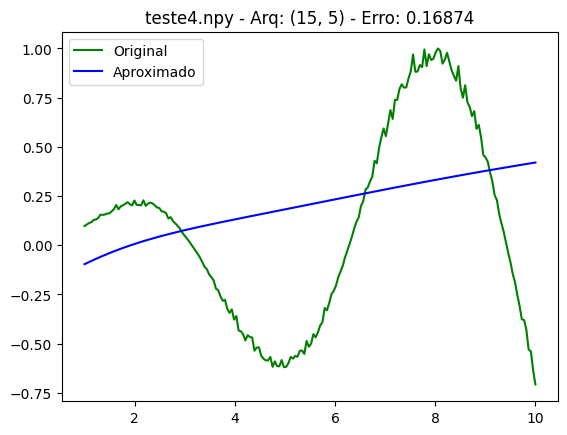

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Arq: (20, 10, 5) - Media: 0.18875 - Desvio: 0.07250


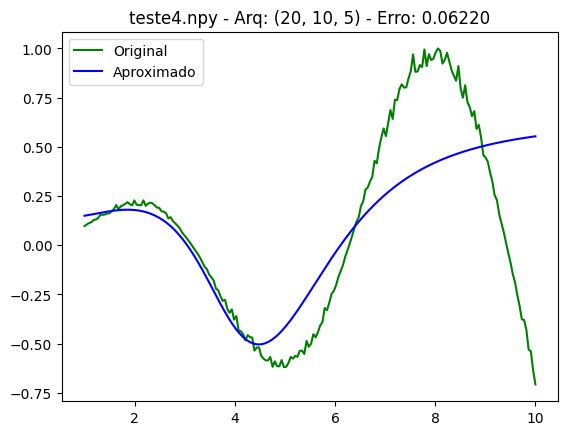

Carregando teste5.npy
Arq: (10,) - Media: 0.17331 - Desvio: 0.00406


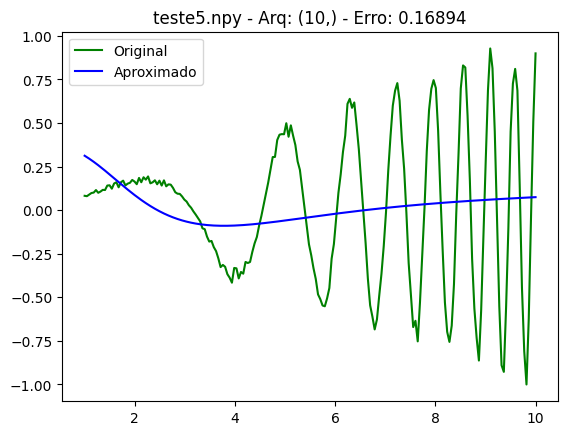

Arq: (15, 5) - Media: 0.17701 - Desvio: 0.00601


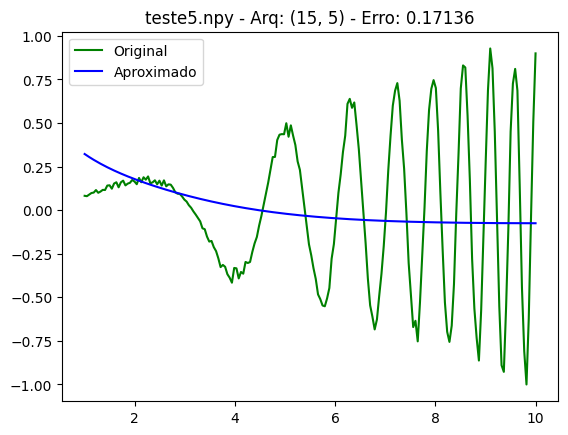

Arq: (20, 10, 5) - Media: 0.18586 - Desvio: 0.01524


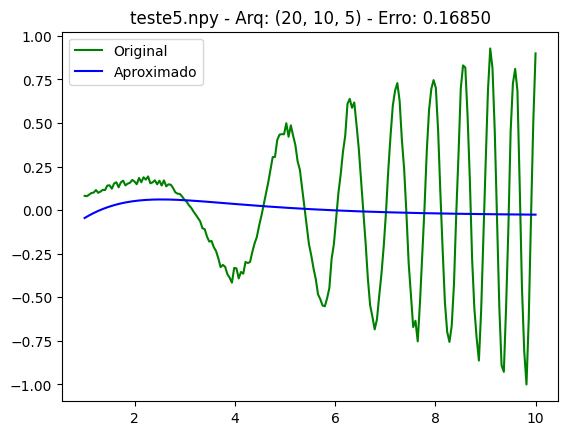

In [9]:
for arquivo in arquivos:
    print(f'Carregando {arquivo}')
    dados = np.load(arquivo)
    x = dados[0]

    scale = MaxAbsScaler().fit(dados[1])
    y = np.ravel(scale.transform(dados[1]))

    for arq in arquiteturas:
        erros = []

        for i in range(10):
            regr = MLPRegressor(hidden_layer_sizes=arq,
                                max_iter=iteracoes,
                                activation='tanh',
                                solver='adam',
                                learning_rate='adaptive')
            regr.fit(x, y)
            y_est = regr.predict(x)
            erro = np.mean((y - y_est) ** 2)
            erros.append(erro)

        media = np.mean(erros)
        desvio = np.std(erros)
        print(f'Arq: {arq} - Media: {media:.5f} - Desvio: {desvio:.5f}')

        melhor_index = np.argmin(erros)
        plt.figure()
        plt.title(f'{arquivo} - Arq: {arq} - Erro: {erros[melhor_index]:.5f}')
        plt.plot(x, y, label='Original', color='green')
        plt.plot(x, regr.predict(x), label='Aproximado', color='blue')
        plt.legend()
        plt.show()